## The Exercise

This simple exercise has two simple parts:

1. Download at least 10 images, from anywhere.
2. Apply the `ImageDataGenerator` to those images, and show them on the screen.

Step one, I hope, is self explainatory. 

In step two make sure that you:

* Make at least 4 different `ImageDataGenerators` using different values for the parameters.
* Generate at least 3 batches per `ImageDataGenerator`.

Then, consider these questions:

* Can you think of a situation or dataset where image rotation might be innappropriate, or damage the models performance?
    * What about flipping?
    * Skewing?
* What advantages and disadvantages might the different values for `fill_mode` provide?
* Can you think of a situation where *any* data augmentation might be innappropriate?
* What could the advantages and disadvantages of data normalization and scaling on image data? e.g. normalizing from (0,255) into (0, 1) or (-1, 1)

1. Download at least 10 images, from anywhere.

Created new directory: C:\Users\Sentinal\Desktop\AaronBranch\intro-to-deep-learning\01-intro-to-deep-learning\Images


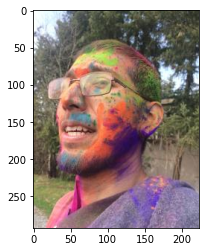

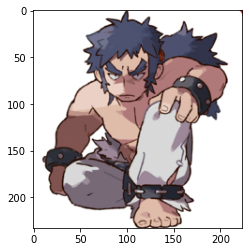

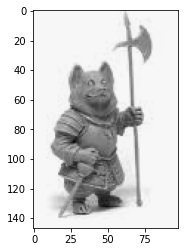

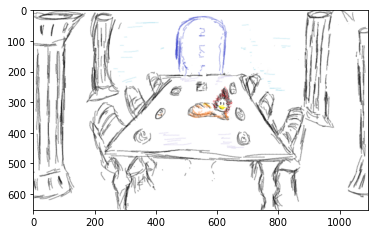

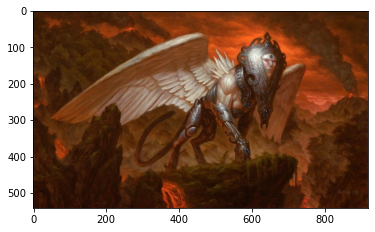

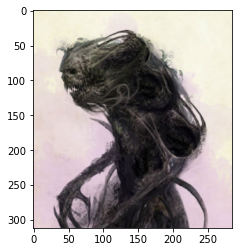

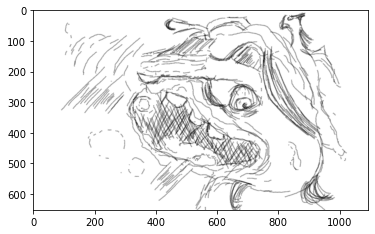

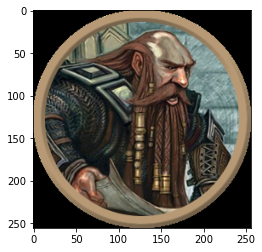

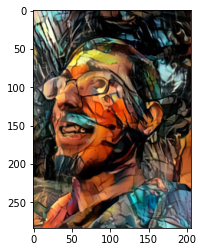

In [11]:
#2. Apply the `ImageDataGenerator` to those images, and show them on the screen.

from tensorflow.keras.preprocessing import image as keras_image
import matplotlib.pyplot as plt
import os

photo_location = 'Images/'#Compiler recognises 03-data-proprocessing is root dir for running files.

for name in os.listdir(photo_location):
    if name.startswith('.'): continue # Avoid looking at hidden files, which the OS sometimes puts in the folder
    image = keras_image.load_img(photo_location + name)
    plt.imshow(image)
    plt.show()
    
 

In step two make sure that you:
Make at least 4 different ImageDataGenerators using different values for the parameters.
Generate at least 3 batches per ImageDataGenerator.

In [26]:
from PIL import Image, ImageOps
import numpy as np

def load_maintain_aspect_ratio(input_image_path, target_size):


    image = Image.open(input_image_path)

    old_size = image.size  # old_size[0] is in (width, height) format

    ratio = float(target_size[0])/max(old_size)
    new_size = tuple([int(x*ratio) for x in old_size])
    # use thumbnail() or resize() method to resize the input image

    # thumbnail is a in-place operation

    # im.thumbnail(new_size, Image.ANTIALIAS)

    image = image.resize(new_size, Image.ANTIALIAS)
    # create a new image and paste the resized on it

    new_im = Image.new("RGB", (target_size[0], target_size[0]))
    new_im.paste(image, ((target_size[0]-new_size[0])//2,
                        (target_size[0]-new_size[1])//2))



    return np.divide(new_im, 255)

<class 'numpy.ndarray'>


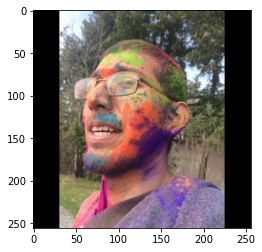

<class 'numpy.ndarray'>


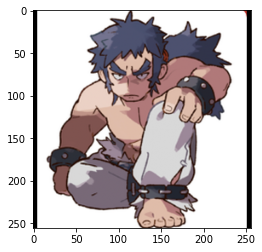

<class 'numpy.ndarray'>


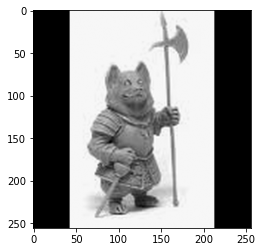

<class 'numpy.ndarray'>


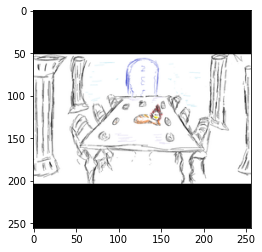

<class 'numpy.ndarray'>


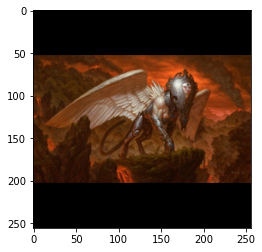

<class 'numpy.ndarray'>


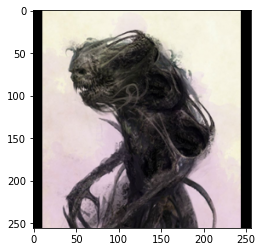

<class 'numpy.ndarray'>


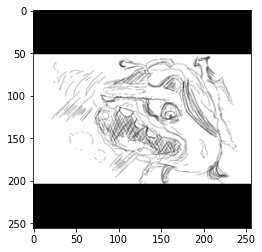

<class 'numpy.ndarray'>


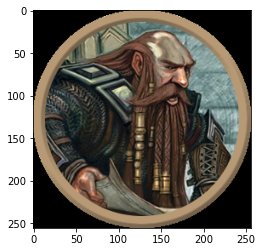

<class 'numpy.ndarray'>


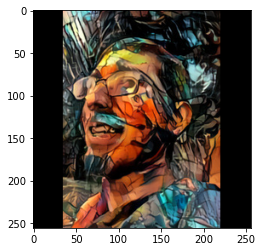

In [27]:
for name in os.listdir(photo_location):
    if name.startswith('.'): continue 
    
    # Note the target_size parameter
    image = load_maintain_aspect_ratio(photo_location + name, target_size=(256, 256))
    print(type(image))
    plt.imshow(image)
    plt.show()

In [53]:

#Creating the Generators: 
images = []
labels = np.array([0,1,2,3,4,5,6,7,8]) # This are required for flow, which we'll see soon.
for name in os.listdir(photo_location):
    if name.startswith('.'): continue 
    
    # Note the target_size parameter
    image = load_maintain_aspect_ratio(photo_location + name, target_size=(256, 256))
    images.append(image)

    
#print(images)    
# Just prove to ourselves nothing has changed here:
images = np.array(images)
#for im in images:
#    plt.imshow(im)
#    plt.show()

OUTER
INNER


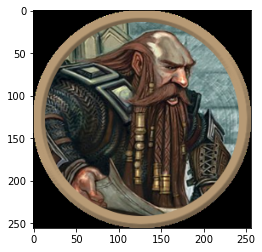

INNER


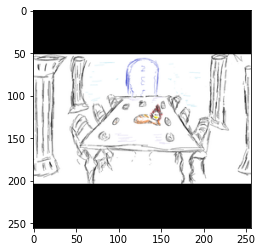

INNER


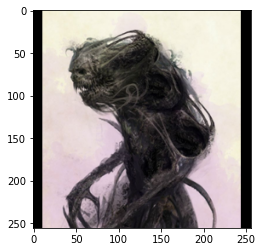

INNER


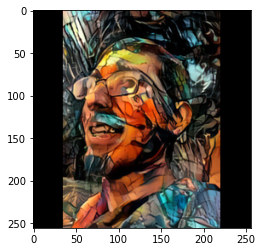

INNER


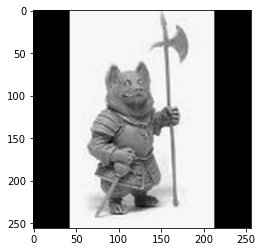

INNER


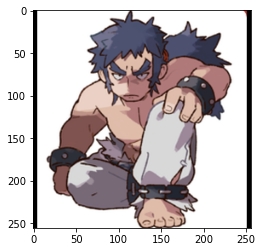

INNER


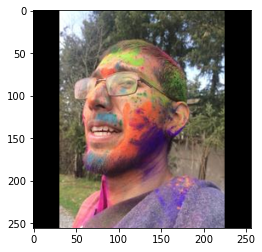

INNER


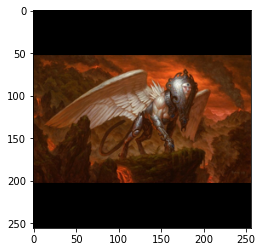

INNER


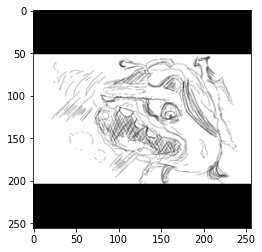

In [54]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# The above is the same as this:
datagen = ImageDataGenerator()
#print(images) 

# The flow method loops forever by design, as it's meant to be used in combination
# with keras fit_generator method. Each time we loop it will yield a batch of images
# which, by default, will be ALL of them. With the default parameters, it will yield
# our three original images
for image_batch, label_batch in datagen.flow(images, labels):
    print("OUTER")
    for image, label in zip(image_batch, label_batch):
        print("INNER") 
        plt.imshow(image)
        plt.show()
    
    break # to avoid infinity...

In [99]:
# Make a quick helper so we don't copy this code over and over...
# And make the display a little nicer. 
def display_images(datagen, rounds=1):
    
    imagestoprint = 3
    plt.figure(figsize=(15, 10))

    i = 0
    for image_batch, label_batch in datagen.flow(images, labels):
        j = 1
        for image, label in zip(image_batch, label_batch): 
            ax = plt.subplot(rounds, imagestoprint, (i*3)+j) #Subplot(repetitions, pictures, position)
            ax.axis('off')
            plt.imshow(image)
            
            if j == imagestoprint: break
                
                
            j += 1

        i += 1
        if i >= rounds: break # to avoid infinity...
        
            
    plt.tight_layout()
    plt.show()

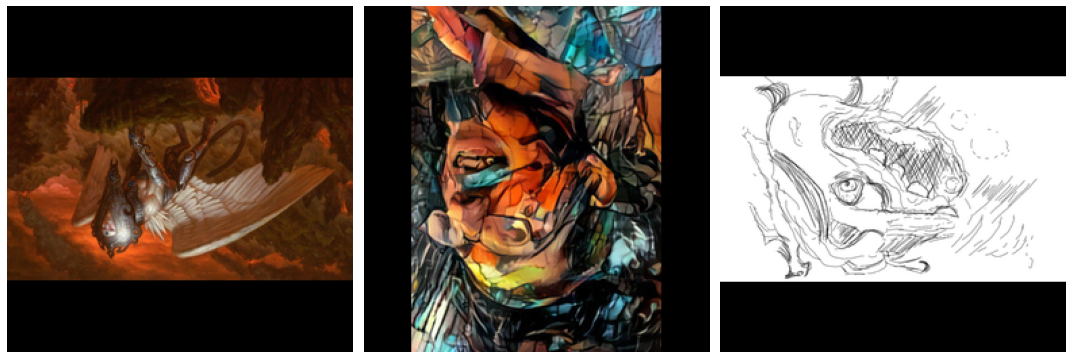

In [100]:
# Add some flips:
datagen = ImageDataGenerator(
    horizontal_flip=True,
    vertical_flip=True,
)

display_images(datagen)

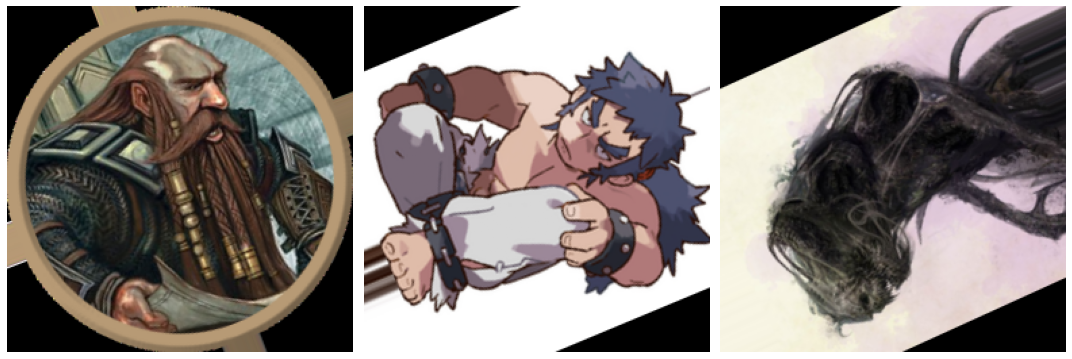

In [101]:
# Random rotations
datagen = ImageDataGenerator(
    rotation_range=360
)

# we don't really have to fit for this one, but it's a good idea 
# to always add this code anyway. It doesn't hurt. 
datagen.fit(images)
display_images(datagen)

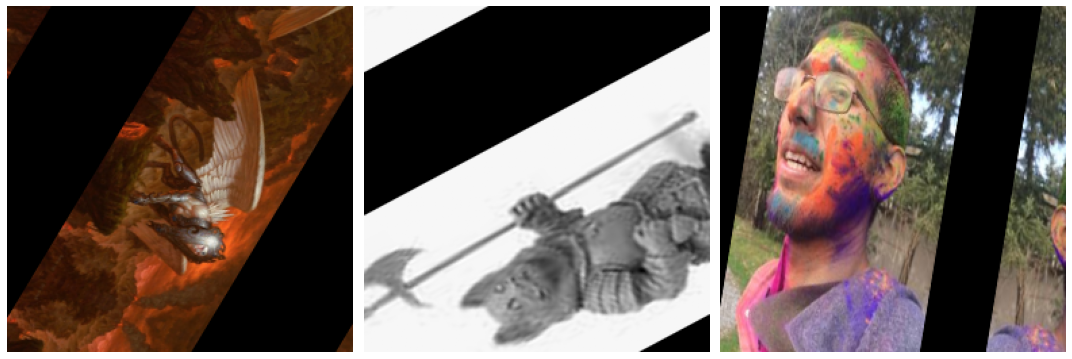

In [110]:

datagen = ImageDataGenerator(
    rotation_range=360,
    width_shift_range=0.2,   # As a float this is the fraction of the width
    height_shift_range=0.2,  # As a float this is the fraction of the height
    shear_range=10, 
    zoom_range=0.5, 
    fill_mode='reflect', 
    cval=0.0
)

datagen.fit(images) # This takes awhile now!
display_images(datagen)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


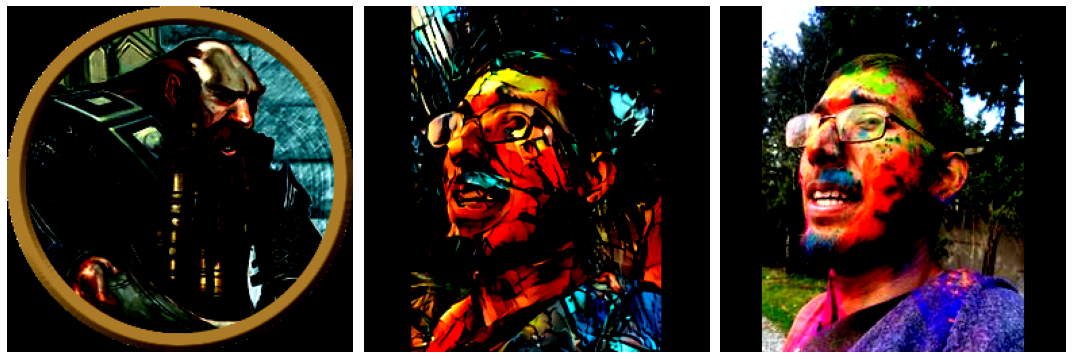

In [108]:
# Normalize the data around, and center it around 0.
datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    fill_mode='reflect'
)

# Our requested transformation will not applied without .fit, 
# because this particular transformation requires information 
# about the data being passed in.
datagen.fit(images)

# We can see from the warnings that these transformations do not maintain the 0-1ness of our data
# In fact, these two combined normalize the data so that the mean is 0 and the std_deviation is 1
# which means we can't really visualize the data perfectly anymore... but you can still get an idea
# of how this transform changes the image data by looking at it:
display_images(datagen)

Then, consider these questions:
Can you think of a situation or dataset where image rotation might be innappropriate, or damage the models performance?
- Image rotation can be inappropriate for number identification
- It would change 9's to 6s which would confuse the model

8s could be misenterpretted as infinite symbols if we are looking to identify characters

Skewing? (what is skewing?) 

This effect: 
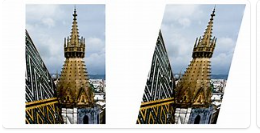

Skewing can mess up the identification of an image
- you could also make some letters or number looks like others by using skewing which
could cause some confusion.


What advantages and disadvantages might the different values for fill_mode provide?
- What is fillmode?
fill_mode: One of {"constant", "nearest", "reflect" or "wrap"}. Default is 'nearest'. Points outside the boundaries of the input are filled according to the given mode:
'constant': kkkkkkkk|abcd|kkkkkkkk (cval=k)

- Constant is useful for fitting an entire picture into frame; this relies on the perfect images and will mostly likely be ideal for most scenarios. 

'nearest': aaaaaaaa|abcd|dddddddd

Nearest seems useful to fit on for either width or height measures and creates a smear effect in order to force itself to fit within || boundary
- This seems more useful for images that have motion involved. Blurring seems to be something that occurs naturally in camera views. So it may help an AI understand what is ok to infer off of.

'reflect': abcddcba|abcd|dcbaabcd
'wrap': abcdabcd|abcd|abcdabcd
---|

Reflect chops pieces off that didn't fit in || and then wraps it around the other side
- This could be useful in training the machine to identifying an image with missing pieces of data, rather than having an entire picture all together. 


Can you think of a situation where any data augmentation might be innappropriate?
What could the advantages and disadvantages of data normalization and scaling on image data? e.g. normalizing from (0,255) into (0, 1) or (-1, 1)

If I augmented my own eyes to render everything I see into 0's and 1's, then I would hope that 0 and 1 have irrational scales. Otherwise I would lose a multitude of data; and if I wanted to keep the 255 structure then I would need to find a hacky way of layering that data into my 'eyes'. 

Eitherway, it would add more cycles to the addressing logic - And what if I wanted to go back to 255? I would need to find a way to go back to 255 if I wanted to. Otherwise the data is lost for sure.

From a machine perspective; I would assume that they could still learn the patterns on a new scale. But images would take the biggest hit on performance - since real life is no 1 and 0 